In [39]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

In [40]:
class AgentState(TypedDict):
    n1: int
    n2: int
    n3: int
    n4: int
    operation: str
    operation2: str
    final_result0: int
    final_result1: int

In [41]:
def add_node(state: AgentState) -> AgentState:
    """1st add node -> n1+n2"""   
    # print("FR0", state['final_result0']) 
    state['final_result0'] = state['n1'] + state['n2']
    # print("FR0", state['final_result0']) 
    return state

def sub_node(state: AgentState) -> AgentState:
    """1st sub node -> n1-n2"""
    state['final_result0'] = state['n1'] - state['n2']
    return state

def add_node2(state: AgentState) -> AgentState:
    """2nd add node -> n3+n4"""
    state['final_result1'] = state['n3'] + state['n4']
    return state

def sub_node2(state: AgentState) -> AgentState:
    """2nd sub node -> n3-n4"""
    state['final_result1'] = state['n3'] - state['n4']
    return state

def decide_node(state: AgentState) -> AgentState:
    """Decide which operation to perform"""
    
    if state['operation'] == '+':
        return "add"
    elif state['operation'] == '-':
        return "sub"
    
def decide_node2(state: AgentState) -> AgentState:
    """Decide which operation to perform"""
    
    if state['operation2'] == '+':
        return "add2"
    elif state['operation2'] == '-':
        return "sub2"


In [42]:
graph = StateGraph(AgentState)

# added nodes
graph.add_node("add_node", add_node)
graph.add_node("sub_node", sub_node)
graph.add_node("add_node2", add_node2)
graph.add_node("sub_node2", sub_node2)
graph.add_node("router", lambda state:state)
graph.add_node("router2", lambda state:state)

# starting node
graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router",
    decide_node,
    {
        "add": "add_node",
        "sub": "sub_node"
    }
)

graph.add_edge("add_node", "router2")
graph.add_edge("sub_node", "router2")

graph.add_conditional_edges(
    "router2",
    decide_node2,
    {
        "add2": "add_node2",
        "sub2": "sub_node2"
    }
)

graph.add_edge("add_node2", END)
graph.add_edge("sub_node2", END)

app = graph.compile()

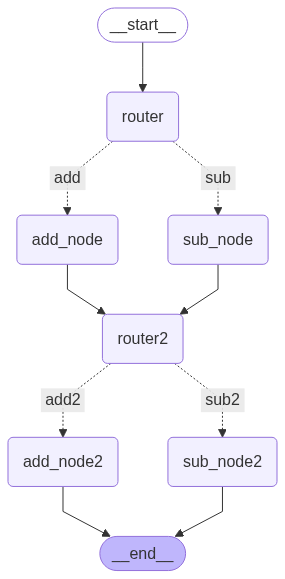

In [43]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [44]:
initial_state = AgentState(n1 = 10, n2 = 5, operation='-', n3 = 7, n4 = 2, operation2='+', final_result0=0, final_result1=0)
app.invoke(initial_state)

{'n1': 10,
 'n2': 5,
 'n3': 7,
 'n4': 2,
 'operation': '-',
 'operation2': '+',
 'final_result0': 5,
 'final_result1': 9}